<h3> Running the "keras_qlayer" jupyter notebook to obtain the Keras quantum layer </h3>

In [1]:
%run keras_qlayer.ipynb

0: ──RX(0.00)─╭●──RY(0.25)─────────────────────┤  <Z>
1: ──RX(0.10)─╰X─╭●─────────RY(0.33)───────────┤  <Z>
2: ──RX(1.50)────╰X────────╭●─────────RY(0.75)─┤  <Z>
3: ──RX(0.33)──────────────╰X─────────RY(0.67)─┤  <Z>
tf.Tensor([0.972 0.946 0.054 0.022], shape=(4,), dtype=float64)


<h3> Importing necessary libraries </h3>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

<h3> Instantiating and visualizing the Moons dataset from Scikit-Learn </h3>

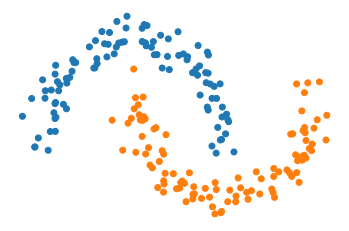

In [3]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

<h3> Creating model with classical and quantum layers </h3> 

In [4]:
tf.keras.backend.set_floatx('float64')

clayer_1 = tf.keras.layers.Dense(2)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])

In [5]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float64',
    'units': 2,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'KerasLayer',
   'config': {'name': 'keras_layer',
    'trainable': True,
    'dtype': 'float64',
    'dynamic': True,
    'output_dim': 4,
    'weight_specs': {},
    'weight_shapes': {'weights': (4,)},
    'argnum': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float64',
    'units': 2,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config

<h3> 1st model </h3>

In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

In [7]:
# qlayer.get_weights()

In [8]:
model1_history = model.fit(X, y_hot, epochs=5, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/5
30/30 [==============================] - 5s 175ms/step - loss: 0.4359 - accuracy: 0.6467 - val_loss: 0.3878 - val_accuracy: 0.7000
Epoch 2/5
30/30 [==============================] - 5s 170ms/step - loss: 0.2962 - accuracy: 0.8200 - val_loss: 0.2839 - val_accuracy: 0.8200
Epoch 3/5
30/30 [==============================] - 5s 170ms/step - loss: 0.2205 - accuracy: 0.8600 - val_loss: 0.2480 - val_accuracy: 0.8200
Epoch 4/5
30/30 [==============================] - 5s 171ms/step - loss: 0.1902 - accuracy: 0.8733 - val_loss: 0.2097 - val_accuracy: 0.8200
Epoch 5/5
30/30 [==============================] - 5s 170ms/step - loss: 0.1685 - accuracy: 0.8533 - val_loss: 0.1869 - val_accuracy: 0.8200


In [9]:
# Verification that the weights of the qlayer update after training
# qlayer.get_weights()

<h3> 2nd model for potentially better performance </h3>

In [10]:
# re-define the layers
clayer_1 = tf.keras.layers.Dense(4)
qlayer_1 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=num_of_qubits)
qlayer_2 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=num_of_qubits)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")

# construct the model
inputs = tf.keras.Input(shape=(2,))
x = clayer_1(inputs)
x_1, x_2 = tf.split(x, 2, axis=1)
x_1 = qlayer_1(x_1)
x_2 = qlayer_2(x_2)
x = tf.concat([x_1, x_2], axis=1)
outputs = clayer_2(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
#print(qlayer_1.get_weights())
#print(qlayer_2.get_weights())

[array([-0.12947321,  0.80423232, -0.69085195, -0.68700578])]
[array([0.2884685 , 0.04300398, 0.37925364, 0.72524919])]


In [12]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

model2_history = model.fit(X, y_hot, epochs=6, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/6
30/30 [==============================] - 10s 334ms/step - loss: 0.4519 - accuracy: 0.5667 - val_loss: 0.3463 - val_accuracy: 0.7400
Epoch 2/6
30/30 [==============================] - 10s 335ms/step - loss: 0.3116 - accuracy: 0.7067 - val_loss: 0.2471 - val_accuracy: 0.7800
Epoch 3/6
30/30 [==============================] - 10s 337ms/step - loss: 0.2387 - accuracy: 0.8000 - val_loss: 0.2146 - val_accuracy: 0.7800
Epoch 4/6
30/30 [==============================] - 10s 333ms/step - loss: 0.2104 - accuracy: 0.7933 - val_loss: 0.1867 - val_accuracy: 0.8400
Epoch 5/6
30/30 [==============================] - 10s 336ms/step - loss: 0.1915 - accuracy: 0.8200 - val_loss: 0.1727 - val_accuracy: 0.8400
Epoch 6/6
30/30 [==============================] - 10s 338ms/step - loss: 0.1828 - accuracy: 0.8200 - val_loss: 0.1664 - val_accuracy: 0.8400


In [13]:
#print(qlayer_1.get_weights())
#print(qlayer_2.get_weights())

<h3> Result Plots </h3>

In [16]:
# summarize history for accuracy
def plot_history(history, mode, model_number):
    if mode == "ACC":
        mode = 'accuracy'
    elif mode == "LOSS":
        mode = 'loss'
    else:
        print("ERROR")
        
    plt.plot(history.history[f"{mode}"])
    plt.plot(history.history[f"val_{mode}"])
    plt.title(f"model{model_number} {mode}")
    plt.ylabel(f'{mode}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

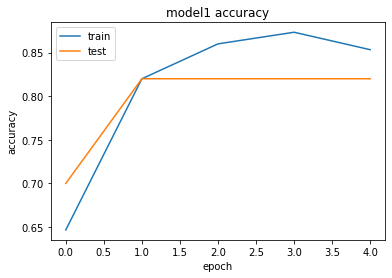

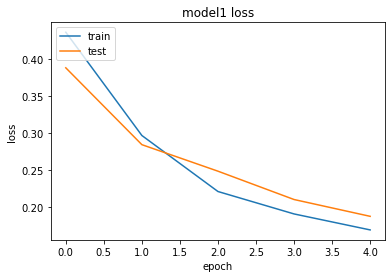

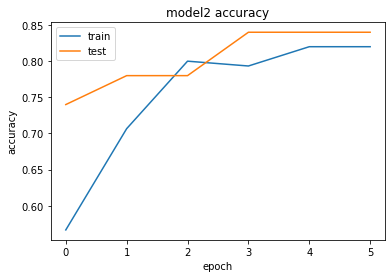

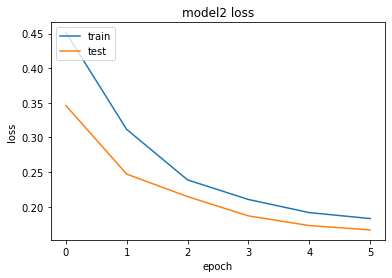

In [17]:
plot_history(model1_history, "ACC", 1)
plot_history(model1_history, "LOSS", 1)

plot_history(model2_history, "ACC", 2)
plot_history(model2_history, "LOSS", 2)